In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polynomial-regression/Ice_cream selling data.csv


In [3]:
# Load data
data = pd.read_csv('/kaggle/input/polynomial-regression/Ice_cream selling data.csv')
print('\nShow first 5 rows:\n', data.head())


Show first 5 rows:
    Temperature (°C)  Ice Cream Sales (units)
0         -4.662263                41.842986
1         -4.316559                34.661120
2         -4.213985                39.383001
3         -3.949661                37.539845
4         -3.578554                32.284531


In [5]:
# Dimensions, data types and general statistics
print('\nData dimensions:', data.shape)
print('\nData types:\n', data.dtypes)
print('\nData general stats.:', data.describe())


Data dimensions: (49, 2)

Data types:
 Temperature (°C)           float64
Ice Cream Sales (units)    float64
dtype: object

Data general stats.:        Temperature (°C)  Ice Cream Sales (units)
count         49.000000                49.000000
mean           0.271755                15.905308
std            2.697672                12.264682
min           -4.662263                 0.328626
25%           -2.111870                 4.857988
50%            0.688781                12.615181
75%            2.784836                25.142082
max            4.899032                41.842986


In [8]:
# Split the data into 2 variables
# X for independent variable
# y for dependent variable
X = data['Temperature (°C)'].values.reshape(-1, 1)
y = data['Ice Cream Sales (units)']

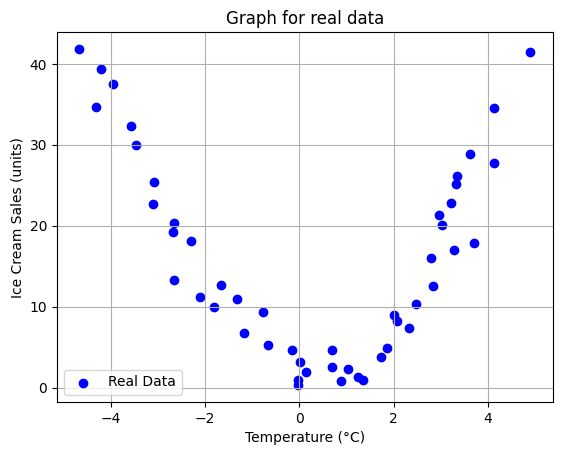

In [9]:
import matplotlib.pyplot as NotImplemented
# Show the graph for data
plt.scatter(X, y, color = 'blue', label = 'Real Data')
plt.title('Graph for real data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# The graph show us this is polynomial and not linear
# Polynomial grade 2
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [11]:
# Train the model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [14]:
from sklearn.model_selection import cross_val_score, KFold

# Perform cross-validation with 5 folds, shuffling the data and setting a random seed
# Evaluate the model using negative MSE score for each fold and calculate the average
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = cross_val_score(model, X_poly, y, cv = cv, scoring = 'neg_mean_squared_error')

# Show the results
print(f'Cross-validation MSE (mean): {-cv_scores.mean():.2f}')
print(f'Cross-validation MSE (std dev): {cv_scores.std():.2f}')

Cross-validation MSE (mean): 11.22
Cross-validation MSE (std dev): 1.98


In [15]:
# Coefficients & Intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [ 0.         -0.82468167  1.82952623]
Intercept: 2.9517741579934498


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediction and evaluate the model
y_pred = model.predict(X_poly)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 10.00
R^2: 0.93


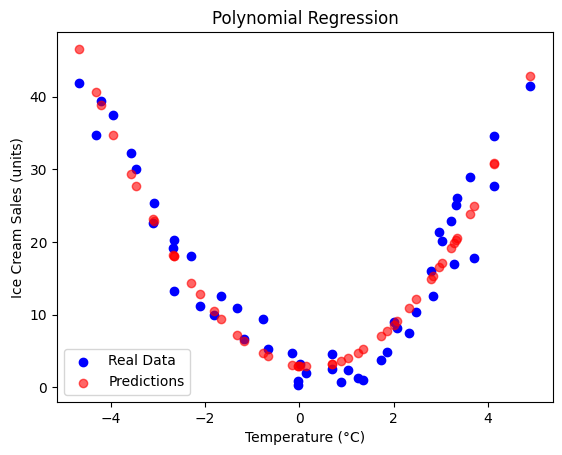

In [17]:
# Show the graph with real data and pred. data

plt.scatter(X, y, color = 'blue', label = 'Real Data')
plt.scatter(X, y_pred, color = 'red', label = 'Predictions', alpha = 0.6)
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Polynomial Regression')
plt.legend()
plt.show()